In [1]:
import os
import pandas as pd
import numpy as np
import random
from pandas import DataFrame
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
import matplotlib
from matplotlib import pyplot as plt
from sklearn.metrics import r2_score


# input file path
datasetdir = "D://indivdual_models//Dataset//2022_MC9K_single_drug"
resultdir = "D://indivdual_models//Result//Model_generation//2022_MC9K_single_drug"

In [2]:
drug_list = ["AEW541","Nilotinib","17-AAG","PHA-665752","Lapatinib","Nutlin-3"
            ,"AZD0530","PF2341066","L-685458","ZD-6474","Panobinostat","Sorafenib"
            ,"Irinotecan","Topotecan","LBW242","PD-0325901","PD-0332991","Paclitaxel"
            ,"PLX4720","RAF265","TAE684","TKI258","Erlotinib","AZD6244"]

Starttime: 20221007
AEW541_//n
train_X shape: (303, 21213)
303 train samples
75 test samples
StartTime : 2022-10-07 15:56:16.753297
EndTime : 2022-10-07 15:56:16.828024
AEW541’s final rmse value is = 0.843710
AEW541 R-squared value is = 0.029172
Nilotinib_//n
train_X shape: (248, 21213)
248 train samples
61 test samples
StartTime : 2022-10-07 15:56:17.070131
EndTime : 2022-10-07 15:56:17.114188
Nilotinib’s final rmse value is = 0.968595
Nilotinib R-squared value is = 0.037639
17-AAG_//n
train_X shape: (302, 21213)
302 train samples
75 test samples
StartTime : 2022-10-07 15:56:17.310778
EndTime : 2022-10-07 15:56:17.383322
17-AAG’s final rmse value is = 1.800896
17-AAG R-squared value is = -0.107595
PHA-665752_//n
train_X shape: (302, 21213)
302 train samples
75 test samples
StartTime : 2022-10-07 15:56:17.550521
EndTime : 2022-10-07 15:56:17.603522
PHA-665752’s final rmse value is = 0.346426
PHA-665752 R-squared value is = 0.015124
Lapatinib_//n
train_X shape: (303, 21213)
303 train sa

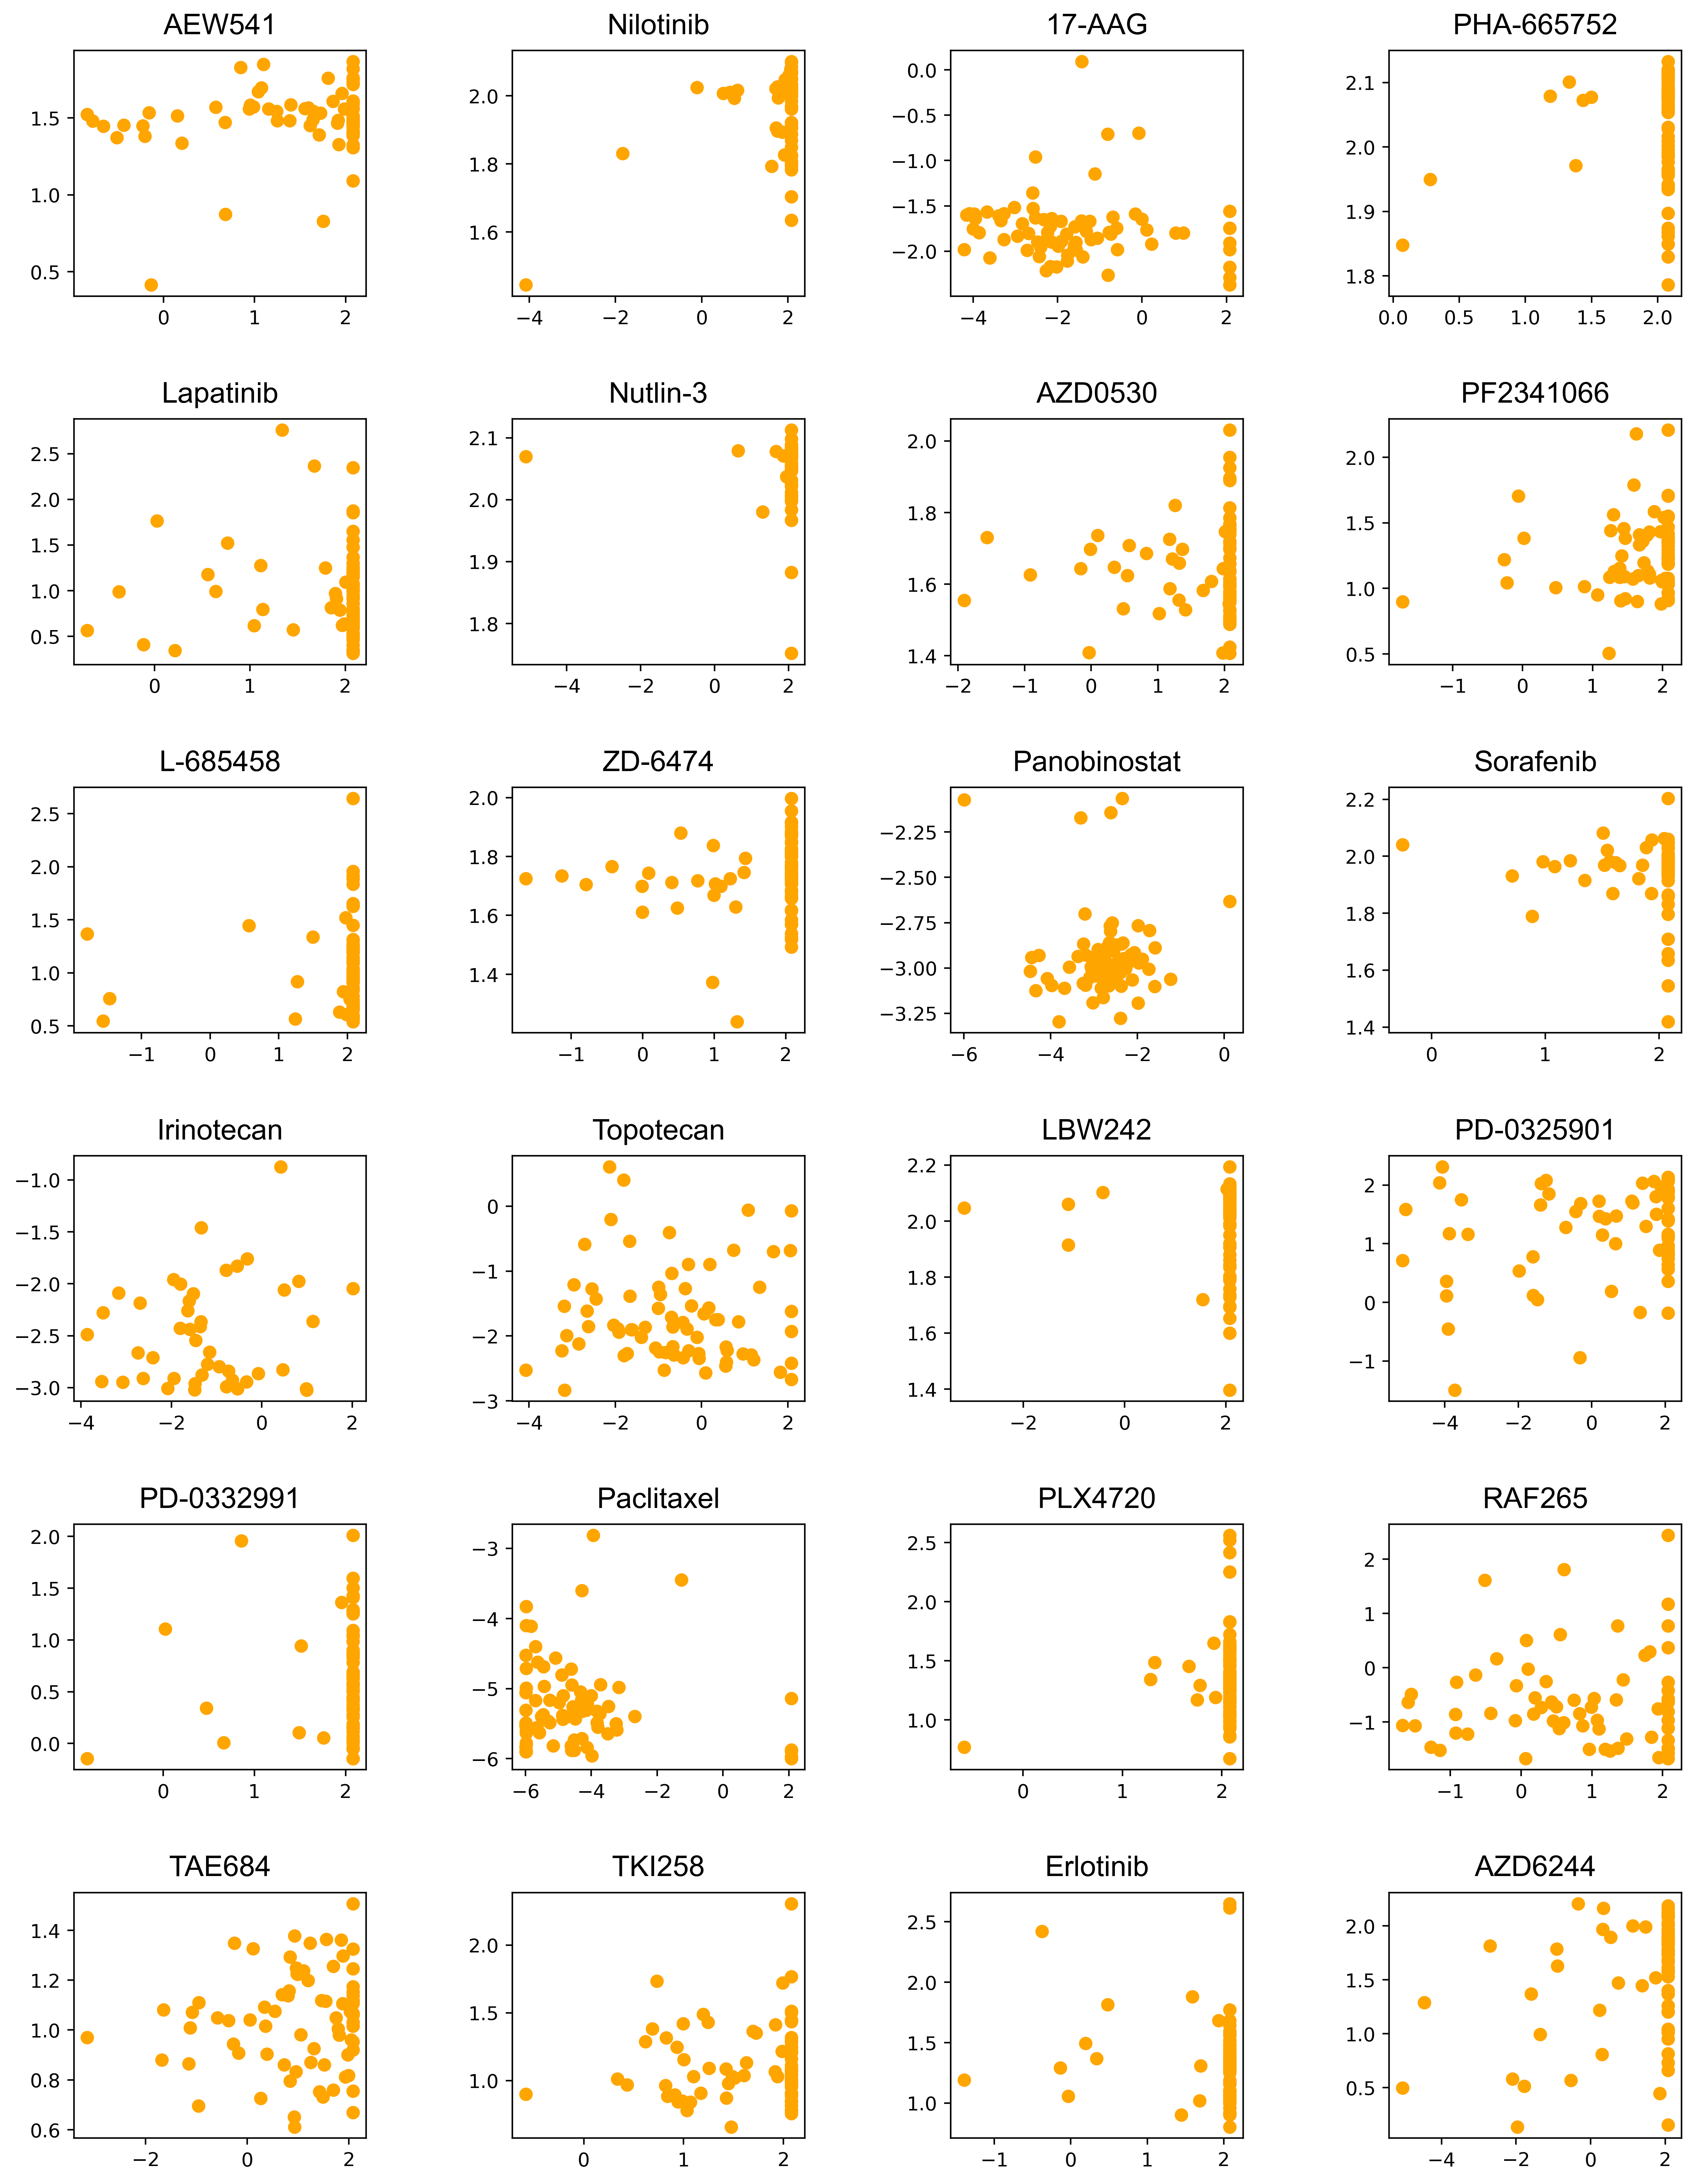

In [3]:
from datetime import datetime
now = datetime.now()
day = now.strftime("%Y%m%d")
print("Starttime: " + day)

rmselist = []
r2list = []

# drug_list = ["Topotecan"]
fig = plt.figure(figsize=(15,20),dpi=400)
fig.subplots_adjust(hspace=0.5, wspace=0.5)
num = 1
for dname in drug_list:
    
    print('%s_//n' % dname)
    # read input file and index file for training and test set
    dataset = np.load(datasetdir + "//MC9K_%s.npz" % dname)
    ss0 = np.load(datasetdir + '//MC9K_%s_0_8_2.npz' % dname)

    # input and index file assign
    x = dataset['x']
    y = dataset['y']
    # y_linear = dataset['y_lnIC50']
    ss0_train = ss0['train']
    ss0_test = ss0['test']
    
    # training and test dataset assign
    train_X, train_y = x[ss0_train], y[ss0_train]
    test_X, test_y = x[ss0_test], y[ss0_test]

    # data typing and the number of dataset
    train_X = train_X.astype('float32')
    test_X = test_X.astype('float32')
    # train_X /= 255
    # test_X /= 255
    print('train_X shape:', train_X.shape)
    print(train_X.shape[0], 'train samples')
    print(test_X.shape[0], 'test samples')
    
    
    # model fitting
    StartTime8 = datetime.now()
    print("StartTime :", StartTime8)

    Ridge_regressor = Ridge(alpha=0.001)
    Ridge_regressor.fit(train_X,train_y)

    EndTime8 = datetime.now()
    print("EndTime :", EndTime8)
    
    predicted_classes = Ridge_regressor.predict(test_X)
    predicted_value = predicted_classes

    import pickle
    import joblib
    joblib.dump(Ridge_regressor, resultdir + '//Ridge//MC9K_Ridge_%s.pkl' % dname) 
    
    # saving predicted ln(IC50)s and ln(IC50)s in the test set
    a = pd.DataFrame(predicted_value)
    b = pd.DataFrame(test_y)
    c = pd.concat([a,b], axis=1)
    c.columns=["Predicted","Test"]
    c.to_csv(resultdir + '//Ridge//predicted_table//MC9K_Ridge_%s_pred_and_val_result.csv' % dname, index=False)

    # RMSE
    rse = ((b[0]-a[0])**2).sum()
    mse = rse / len(b)
    rmse = np.sqrt(mse)
    print("%s’s final rmse value is = %f" % (dname,rmse))
    
    # R-squared value
    r2_value = r2_score(b,a)
    print("%s R-squared value is = %f" % (dname,r2_value))
    rmselist.append(rmse)
    r2list.append(r2_value)
          
    plt.subplot(6,4,num)
    plt.scatter(test_y,predicted_value,c='orange')
    plt.title(dname,fontdict ={'fontsize' : 15},fontname="Arial",y = 1.02)
    plt.tick_params(labelsize=10)
    
    num += 1
#     plt.scatter(test_y,predicted_value,c='red')
#     plt.xlabel('test_IC50_value')
#     plt.ylabel('predicted_IC50_value')
#     plt.savefig(workdir + '//%s_test_scatterplot.png' % dname)
    

figdir = "D://indivdual_models//Result//Figure"
plt.savefig(figdir +'//MC9K_single_drug_Ridge_plot.png', dpi=400)

In [4]:
num

25

In [5]:
a = pd.DataFrame(drug_list)
b = pd.DataFrame(rmselist)
c =pd.DataFrame(r2list)
result = pd.concat([a,b,c],axis=1)
result.columns = ['Drug','RMSE','R2value']

In [6]:
result

,Drug,RMSE,R2value
0,AEW541,0.843710,0.029172
1,Nilotinib,0.968595,0.037639
2,17-AAG,1.800896,-0.107595
3,PHA-665752,0.346426,0.015124
4,Lapatinib,1.154286,-2.289062
5,Nutlin-3,0.853066,-0.024549
6,AZD0530,0.881728,-0.008664
7,PF2341066,0.810907,-0.429013
8,L-685458,1.158221,-1.357708
9,ZD-6474,0.855222,-0.002373


In [7]:
result.to_csv(resultdir +'//MC9K_Ridge_24drugs_metrics.csv', index=False)